# 1) Introduction to data
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English , tagged acording being ham (legitimate) or spam.
Our aim is to build an email spam dtector. Then use ML to train the spam adtector to recognie and classify emails into spam and non-spam . 

# 2) Modules Required

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 3) Basic info about dataset

#### Data Analysis

In [25]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [26]:
df.shape

(5572, 5)

In [27]:
# drop columns that are not needed
cols_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop (columns=cols_drop, inplace=True)

In [28]:
# rename columns
df.columns = ['label','message']

In [29]:
df = df.drop_duplicates()
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [31]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [32]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

#### Data Visualisation

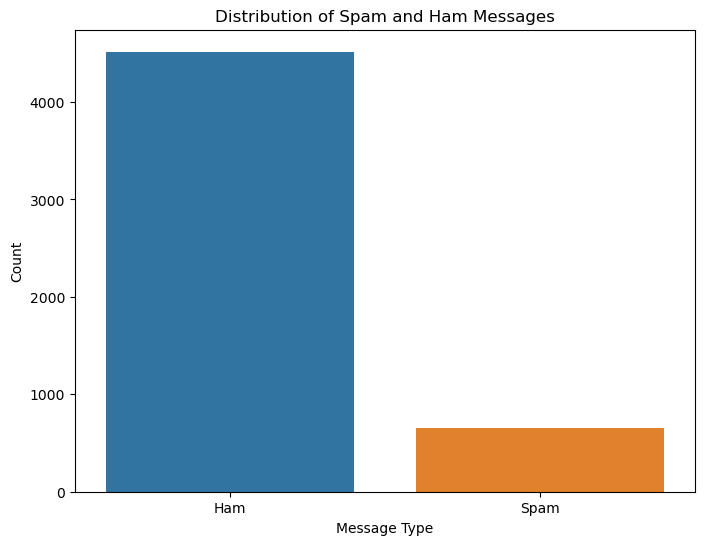

In [33]:
# Creating  bar plot to visualize the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

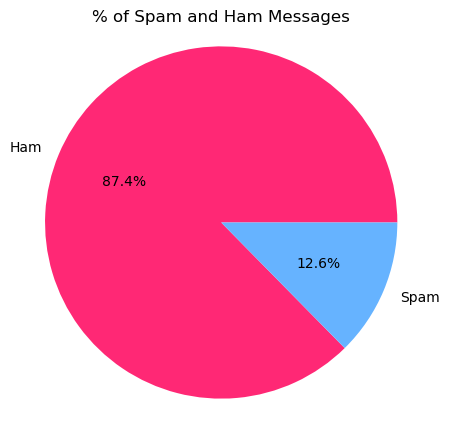

In [41]:
# Counting number of spam and ham messages
spam_count = df['label'].value_counts()[1]
ham_count = df['label'].value_counts()[0]

# Creating pie chart to show the % of spam and ham messages
plt.figure(figsize=(5,5))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2875', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('% of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Data Preprocessing

In [42]:
# Defining a function to preprocess text data
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

In [44]:
# Creating copy of df 
df1 = df.copy()
# Creating copy of 'message' column
df1['message'] = df1['message'].apply(lambda x: preprocess_text(x))
df1['label'] = df1['label'].map({'ham':0, 'spam':1})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# 4) Model Development

In [45]:
# Split the dataset into features(X) and labels(Y)
X = df1['message']
Y = df1['label']

In [46]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  
X_test_tfidf = tfidf_vectorizer.transform(X_test)  

#### Naive Bayes Multinomial Distribution Model

In [65]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_train)
Y_pred = clf.predict(X_test_tfidf)
report = classification_report(Y_test, Y_pred)
print(report)

# Perform 5-fold cross-validation (you can adjust 'cv' as needed)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train_tfidf, Y_train, cv=5)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.83       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

Cross-Validation Scores: [0.9637243  0.96009674 0.96856106 0.96493349 0.9528416 ]
Mean CV Score: 0.962031438935913


#### Logistic Regression Model

In [76]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train_tfidf, Y_train)
Y_pred = clf_lr.predict(X_test_tfidf)
report = classification_report(Y_test, Y_pred)
print(report)

# Perform 5-fold cross-validation (you can adjust 'cv' as needed)
cv_scores = cross_val_score(clf_lr, X_train_tfidf, Y_train, cv=5)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       0.98      0.71      0.82       138

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

Cross-Validation Scores: [0.9407497  0.93954051 0.96130593 0.94316808 0.94679565]
Mean CV Score: 0.9463119709794438


#### Support Vector Model

In [81]:
# Replace MultinomialNB with Support Vector Machine (SVM)
clf_SVM = SVC(kernel='linear', C=1)  #kernel and C parameter can be adjusted
clf_SVM.fit(X_train_tfidf, Y_train)
Y_pred = clf_SVM.predict(X_test_tfidf)
report = classification_report(Y_test, Y_pred)
print(report)

# Perform 5-fold cross-validation (you can adjust 'cv' as needed)
cv_scores = cross_val_score(clf_SVM, X_train_tfidf, Y_train, cv=5)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.88      0.92       138

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Cross-Validation Scores: [0.97702539 0.96977025 0.98428053 0.97823458 0.96856106]
Mean CV Score: 0.9755743651753324


#### Model Predictions

In [82]:
# Define the input text
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = clf.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction: Ham


In [83]:
# Define the input text
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

# Preprocess the input text
input_counts = vectorizer.transform(input_mail)
input_tfidf = tfidf_transformer.transform(input_counts)

# Make a prediction
prediction = clf.predict(input_tfidf)

# Interpret the prediction
if prediction[0] == 0:
    result = "Ham"
else:
    result = "Spam"

# Print the result
print(f"Prediction: {result}")

Prediction: Spam


## Result Analysis

In [88]:
pip install wordcloud


     ------------------------------------ 152.1/152.1 kB 909.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

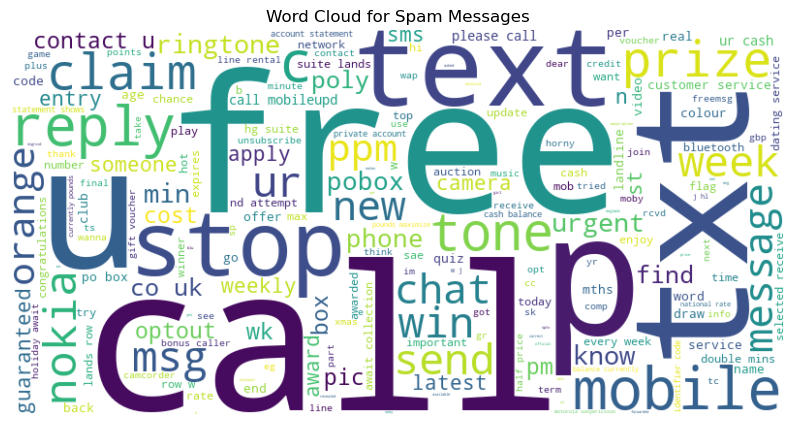

In [90]:
# Combine the predicted labels (0 for ham, 1 for spam) with the test messages
df_results = pd.DataFrame({'message': X_test, 'label': Y_pred})

# Filter out the spam messages
spam_messages = df_results[df_results['label'] == 1]['message']

# Join the spam messages into a single text
spam_text = " ".join(spam_messages)

# Generate a word cloud for spam messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Messages")
plt.show()

In [91]:
# Process the text to extract word frequencies
word_freq = WordCloud().process_text(spam_text)

# Sort the word frequencies and get the top 10 words
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 words
for word, frequency in sorted_word_freq:
    print(f'{word}: {frequency}')

call: 52
free: 46
u: 36
p: 36
txt: 33
text: 28
stop: 26
mobile: 23
c: 21
reply: 21
